<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# pip install feature_engine

In [79]:
# pip install category_encoders

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import RareLabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [81]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['Dataset.xlsx', 'Kaggle Codes', 'MMAI831_AI_in_Marketing_Project_OLD.ipynb', 'cleaned_data.csv', ' MMAI831_AI_in_Marketing_EMC_Model_Development.ipynb']


In [82]:
data = pd.read_csv('cleaned_data.csv')

Need to use the Click on columns as targets now. We can do it one by one or train based on all targets.

In [83]:
data.drop(data.columns[39:59], axis=1, inplace=True)

In [84]:
data.drop(data.columns[59:79], axis=1, inplace=True)

In [85]:
df=data.copy()

In [86]:
y=df.iloc[:, -20:]

In [87]:
df.drop(df.columns[39:59], axis=1, inplace=True)

In [88]:
drop_columns = ['Fave Sports', 'Most visited websites', 'Most listened musics', 'Most watched movies', 'Most watched tv programmes', 'Most read books']

In [89]:
df.drop(drop_columns, axis=1, inplace=True)

# Feature Engineering - Treating Categorical Features

We droped some columns for now, but will encode the 3 remaining features.

In [90]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Type of Job', 'Home country', 'Timepass'], dtype='object')

In [91]:
df['Type of Job'].value_counts()

Contract employment       39
Student                   37
Temporary                 18
Self-employment           14
Unemploied                 6
Housewife/Househusband     2
Odd job                    2
Consulting                 2
Name: Type of Job, dtype: int64

In [92]:
df['Home country'].value_counts()

United States of America    67
United Kingdom              20
Canada                      17
India                        6
Slovenia                     2
Singapore                    2
Great Britain                1
Czech Republic               1
Saudi Arabia                 1
Romania                      1
Phillipines                  1
Italy                        1
Name: Home country, dtype: int64

In [93]:
df['Timepass'].value_counts()

Internet    61
Reading     23
Sports      14
Music       11
Movie       11
Name: Timepass, dtype: int64

In [94]:
# data['Fave Sports'].value_counts()

In [95]:
# data['Most visited websites'].value_counts()

In [96]:
rare_encoder = RareLabelEncoder(
  tol=0.02,  # lower tolerance to capture more rare categories
  n_categories=4,  # minimal number of categories to re-group rare categories
  variables=['Home country'],  # variable to re-group
  replace_with='Rare'  # value to replace rare categories with
)
df['Home country'] = rare_encoder.fit_transform(df[['Home country']])

In [97]:
rare_encoder = RareLabelEncoder(
  tol=0.02,  # lower tolerance to capture more rare categories
  n_categories=4,  # minimal number of categories to re-group rare categories
  variables=['Type of Job'],  # variable to re-group
  replace_with='Rare'  # value to replace rare categories with
)
df['Type of Job'] = rare_encoder.fit_transform(df[['Type of Job']])

In [98]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Type of Job'])

df = pd.get_dummies(df, columns=['Home country'])

df = pd.get_dummies(df, columns=['Timepass'])

In [99]:
# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = ['Age', 'Income', 'Openness to Experience', 'Conscientiousness', 'Extraversion',
#                   'Agreeableness', 'Neuroticism', 'Number of countries visited']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Model development

In [100]:
# pip install category_encoders

In [101]:
# pip install feature_engine

In [102]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import sys
import numpy as np  
import pandas as pd  
import datetime as dt

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from prettytable import PrettyTable
# from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import compute_class_weight
# from sklearn.metrics import plot_roc_curve
from sklearn import metrics

from feature_engine.encoding import RareLabelEncoder

from category_encoders import *
from category_encoders.wrapper import PolynomialWrapper
from category_encoders import OneHotEncoder, TargetEncoder, JamesSteinEncoder, CatBoostEncoder, MEstimateEncoder, WOEEncoder, LeaveOneOutEncoder

from google.colab import files

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tabulate import tabulate


In [106]:
y_test.head()

,clicks Automotive,clicks Baby Products,clicks Health & Beauty,clicks Media,clicks Consumer Electronics,clicks Console & Video Games,clicks Tools,clicks Living,clicks Grocery,clicks Home,clicks Betting,clicks Jewellery & Watches,clicks Musical Instruments,clicks Office,clicks Pet Supplies,clicks Computer Software,clicks Sports,clicks Toys & Games,clicks Dating,clicks Clothing & Shoes
44,1,0,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,0
47,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0
55,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
26,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [107]:
X_train.head()

,Gender,Age,Weekly working hours,Income,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Number of countries visited,visits web in Automotive,visits web in Baby Products,visits web in Health & Beauty,visits web in Media,visits web in Consumer Electronics,visits web in Console & Video Games,visits web in Tools,visits web in Living,visits web in Grocery,visits web in Home,visits web in Betting,visits web in Jewellery & Watches,visits web in Musical Instruments,visits web in Office,visits web in Pet Supplies,visits web in Computer Software,visits web in Sports,visits web in Toys & Games,visits web in Dating,visits web in Clothing & Shoes,Type of Job_Contract employment,Type of Job_Rare,Type of Job_Self-employment,Type of Job_Student,Type of Job_Temporary,Type of Job_Unemploied,Home country_Canada,Home country_India,Home country_Rare,Home country_United Kingdom,Home country_United States of America,Timepass_Internet,Timepass_Movie,Timepass_Music,Timepass_Reading,Timepass_Sports
42,0,33,1,1,1,-1,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,0,18,0,2,0,0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
15,1,22,1,0,1,-1,3,1,0,9,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
114,1,21,0,0,1,1,2,2,1,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
76,1,30,1,1,1,0,2,1,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [108]:
# Drop al features excep OCEAN 
X_train_OCEAN = X_train.iloc[:, 5:10:]
X_test_OCEAN = X_test.iloc[:, 5:10:]

# Define the Models

In [68]:
rf_clf = RandomForestClassifier(
          n_estimators = 10,
          criterion = 'entropy', 
          max_depth = None, # 
          min_samples_split=2,
          min_samples_leaf=1, 
          max_features= 'sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
          max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
          #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
          min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
          bootstrap = True,
          warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
          class_weight = 'balanced',
          max_samples = None,
          verbose = 0,
          n_jobs = -1,
          random_state = 17,
)

In [69]:
# importing the lightgbm module
import lightgbm as lgb
# initializing the model
LightGBM_Clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves = 5,
    max_depth=-1,
    learning_rate = 0.02,
    n_estimators=10,
    subsample_for_bin=200000,
    objective=None,
    class_weight= None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=17, 
    n_jobs=-1, 
    silent=True, 
    importance_type='split',
    verbosity = 0,
    
)

In [70]:
xgboost_clf = XGBClassifier(max_depth = 10, # the larger the more prone to overfit, range 3-10
                learning_rate = .4, # range [0,1], typically=0.01-0.2
                n_estimators = 10,
                verbosity = 1,
                objective = "binary:logistic",
                booster = "gbtree", # gblinear or dart
                n_jobs = -1,
                gamma = 0, 
                # Minimum loss reduction required to split. range=[0,inf],
                # The larger gamma is, the more conservative the algorithm will be.
                min_child_weight = 1, # used to restrict overfitting
                max_delta_step = 0,
                subsample = 0.8,
                colsample_bytree = 0.2,
                # colsample_bylevel = 0.5,
                # colsample_bynode = 0.5,
                reg_alpha = 0,
                reg_lambda = 1,
                scale_pos_weight = 0.5, #[default=1]
                random_state = 17,
                            
)

In [145]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(
    penalty='l2',  # Regularization type (default is L2)
    C=1.0,  # Inverse of regularization strength (default is 1.0)
    solver='liblinear',  # Optimization algorithm (default is 'lbfgs')  #For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones
    max_iter=500,   # Maximum number of iterations (default is 100)
    class_weight = "balanced", 
    random_state=17  # Random state for reproducibility (default is None)
)

# Fit the Models

## Logistic Regression

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.428571 | 0.75     |   0.545455 |  4        |
| 1            |    0.941176 | 0.8      |   0.864865 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.684874 | 0.775    |   0.70516  | 24        |
| weighted avg |    0.855742 | 0.791667 |   0.81163  | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.416667 | 0.454545 |   0.434783 | 11        |
| 1            |    0.5      | 0.461538 |   0.48     |

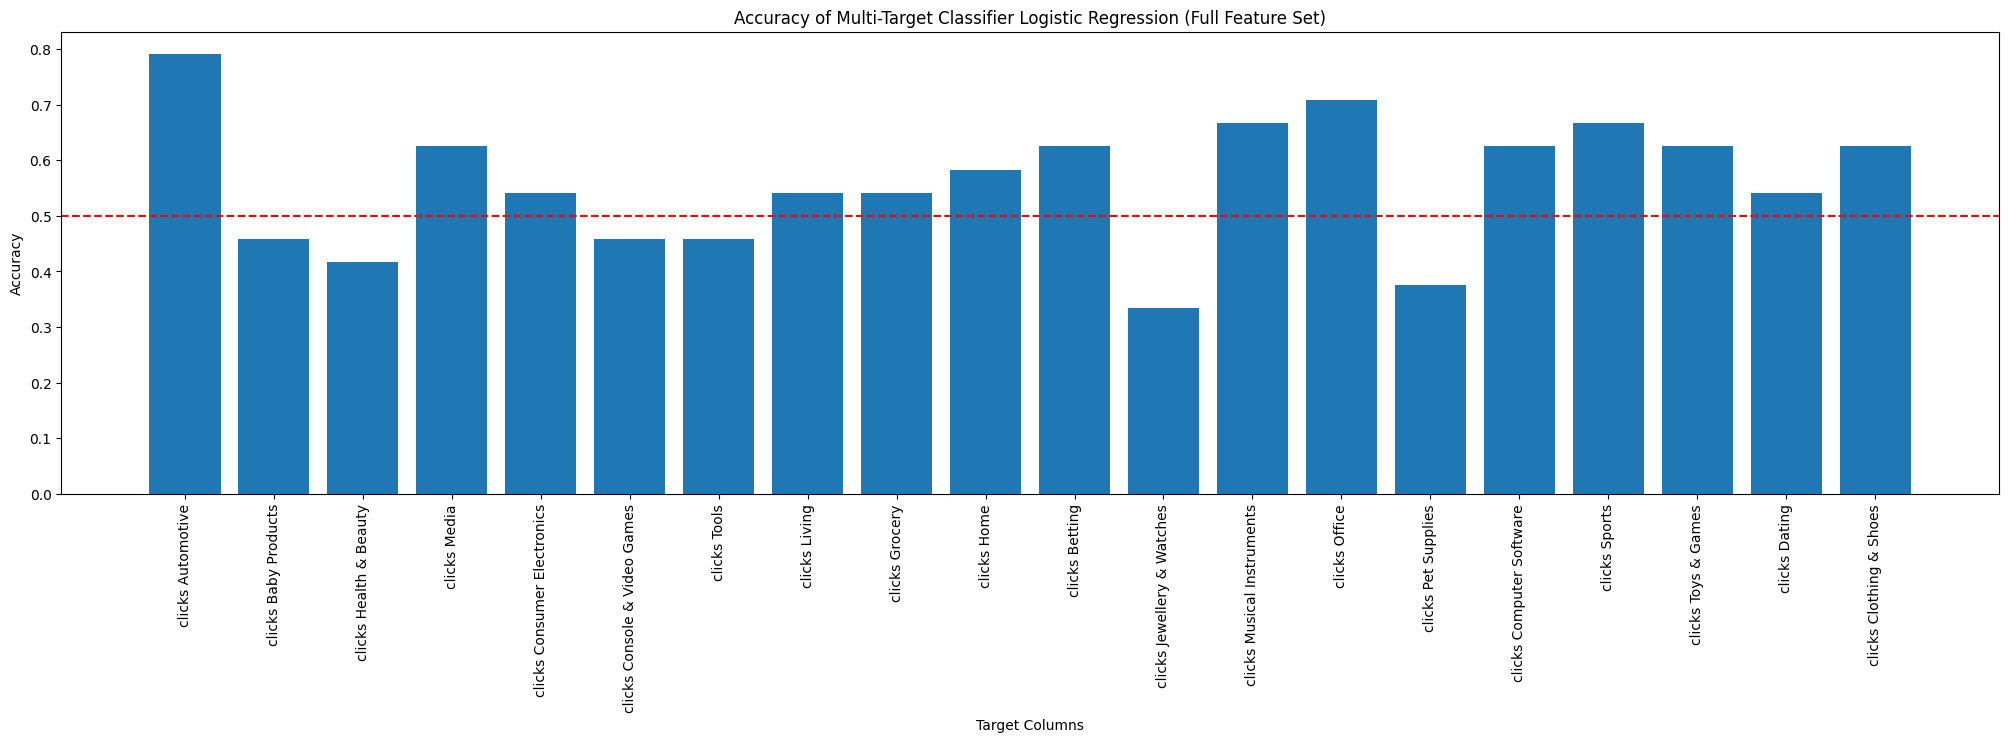

In [175]:
# Train with full data
multi_target_classifier = MultiOutputClassifier(logistic_reg)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.2      | 0.5      |   0.285714 |  4        |
| 1            |    0.857143 | 0.6      |   0.705882 | 20        |
| accuracy     |    0.583333 | 0.583333 |   0.583333 |  0.583333 |
| macro avg    |    0.528571 | 0.55     |   0.495798 | 24        |
| weighted avg |    0.747619 | 0.583333 |   0.635854 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.416667 | 0.454545 |   0.434783 | 11        |
| 1            |    0.5      | 0.461538 |   0.48     |

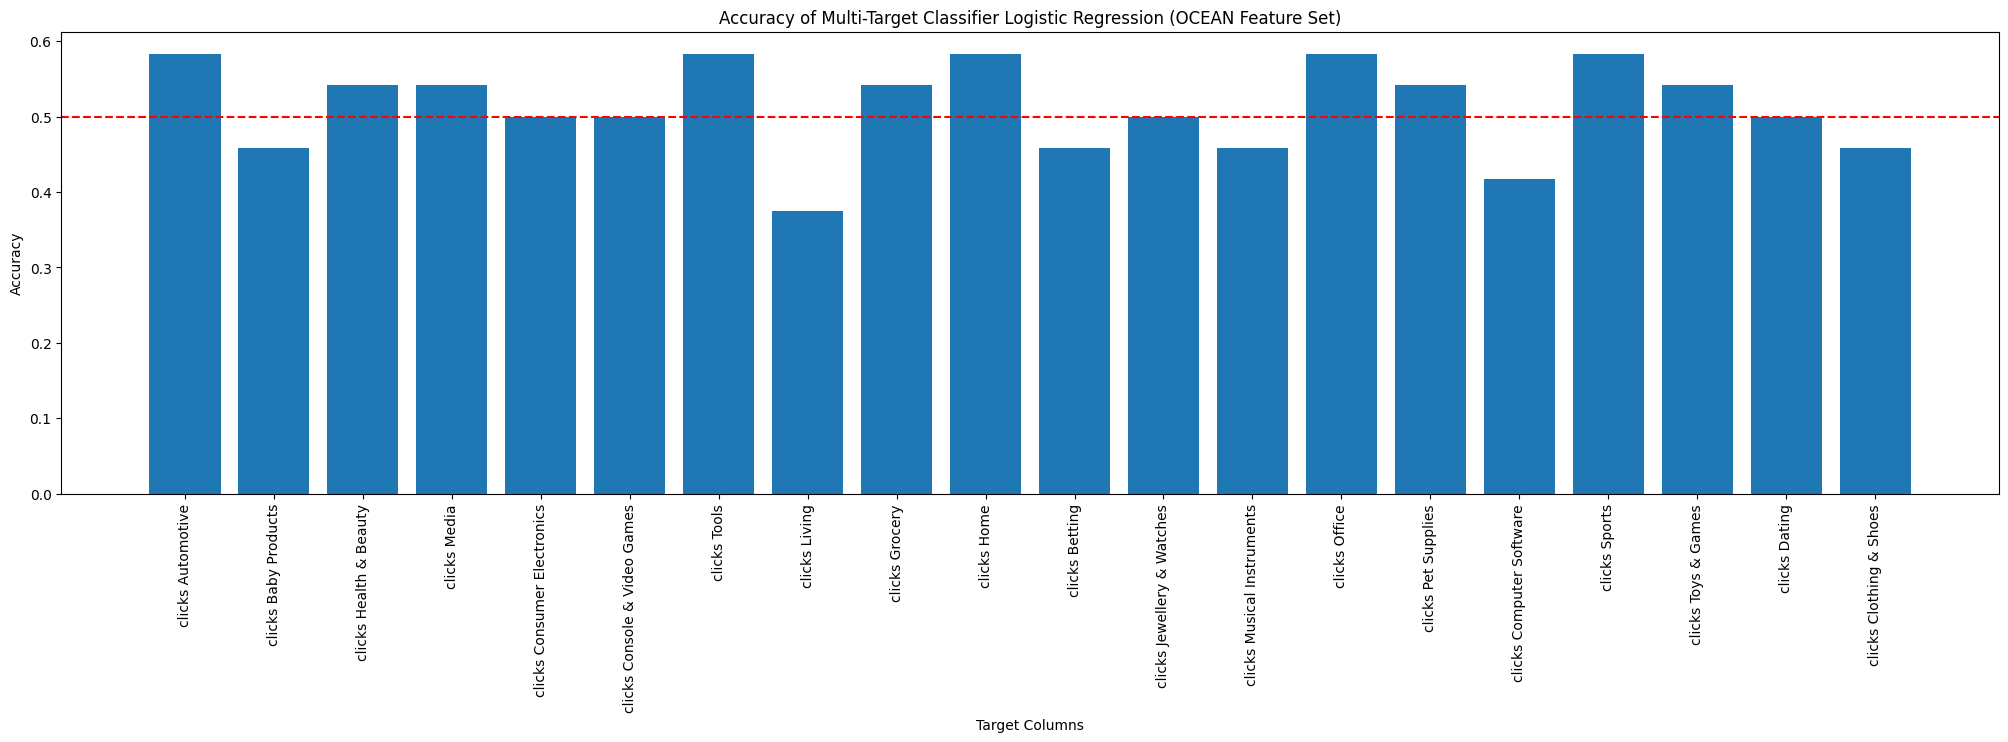

In [176]:
# Train with OCEAN data
multi_target_classifier = MultiOutputClassifier(logistic_reg)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
OCEAN_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()

## Naive_Bayes

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.176471 |    0.75  |   0.285714 |     4     |
| 1            |    0.857143 |    0.3   |   0.444444 |    20     |
| accuracy     |    0.375    |    0.375 |   0.375    |     0.375 |
| macro avg    |    0.516807 |    0.525 |   0.365079 |    24     |
| weighted avg |    0.743697 |    0.375 |   0.417989 |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.909091 |   0.645161 | 11        |
| 1            |    0.75     | 0.230769 |   0.352941 |

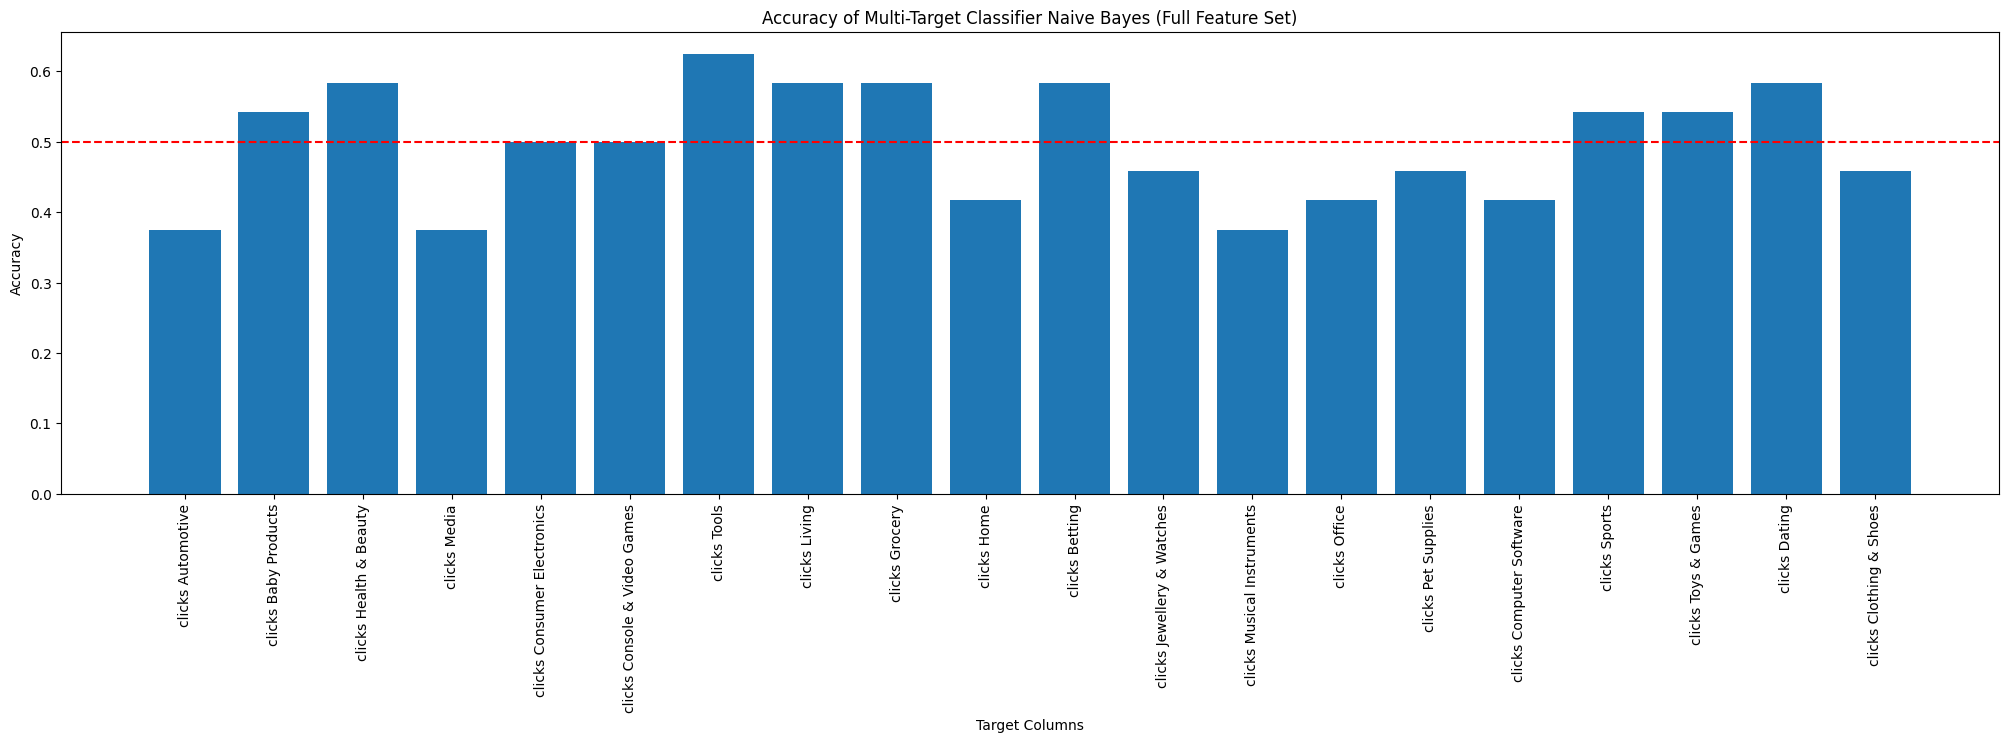

In [177]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Train with full data
multi_target_classifier = MultiOutputClassifier(naive_bayes)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Naive Bayes (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        |    0.25  |   0.4      |     4     |
| 1            |    0.869565 |    1     |   0.930233 |    20     |
| accuracy     |    0.875    |    0.875 |   0.875    |     0.875 |
| macro avg    |    0.934783 |    0.625 |   0.665116 |    24     |
| weighted avg |    0.891304 |    0.875 |   0.84186  |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.636364 |   0.56     | 11        |
| 1            |    0.6      | 0.461538 |   0.521739 |

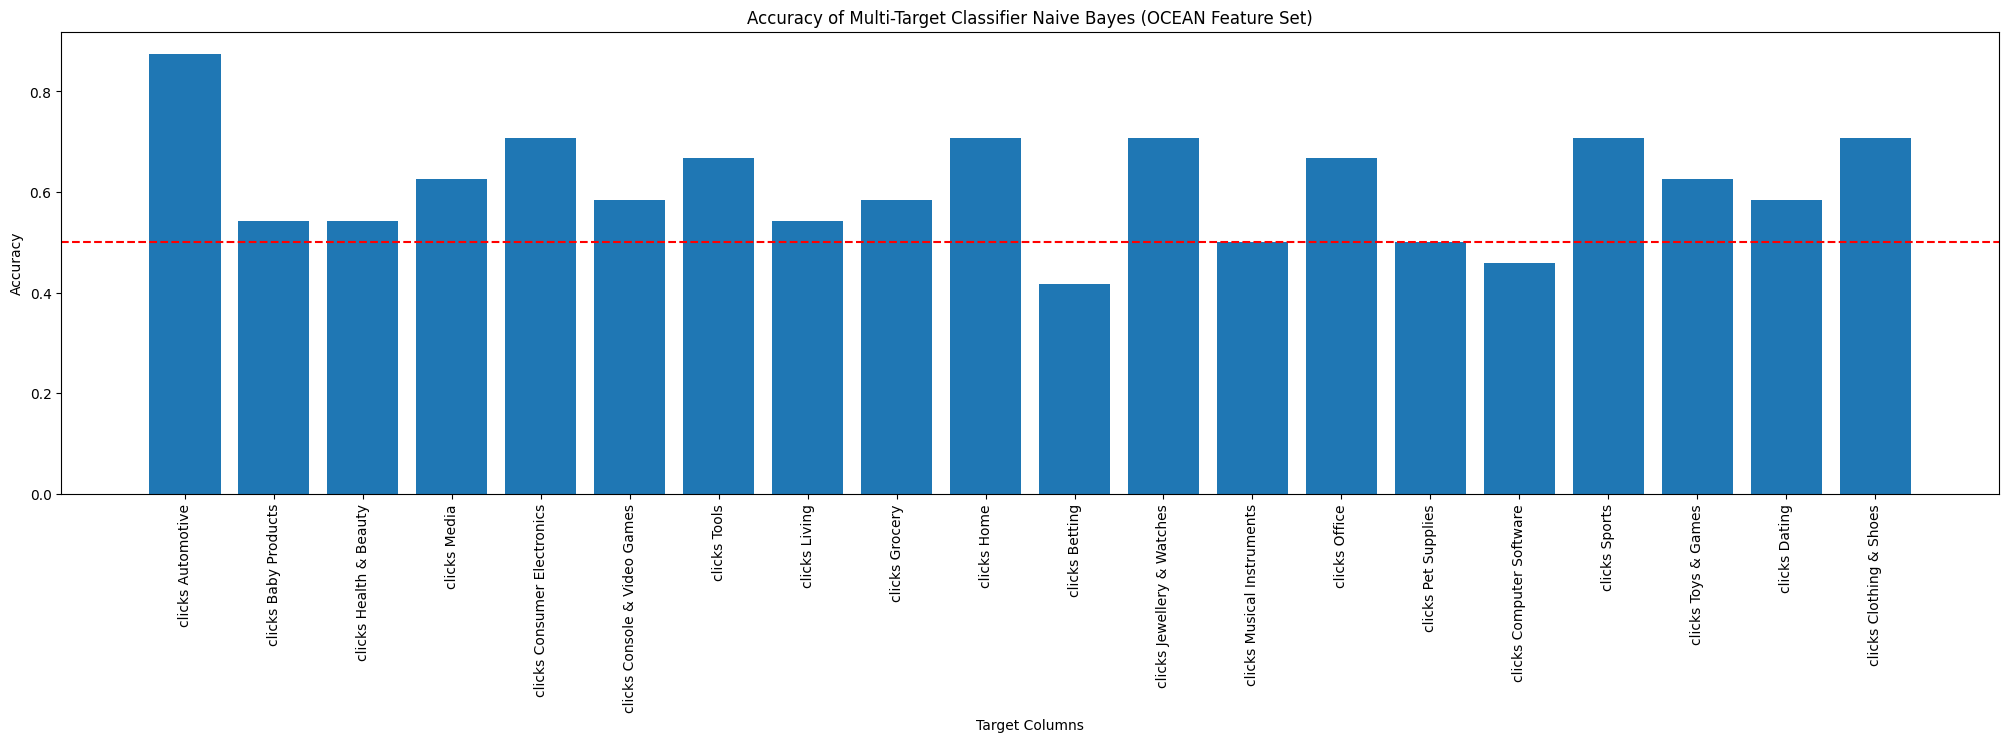

In [178]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Train with full data
multi_target_classifier = MultiOutputClassifier(naive_bayes)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
OCEAN_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Naive Bayes (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()


## SVM

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0        |

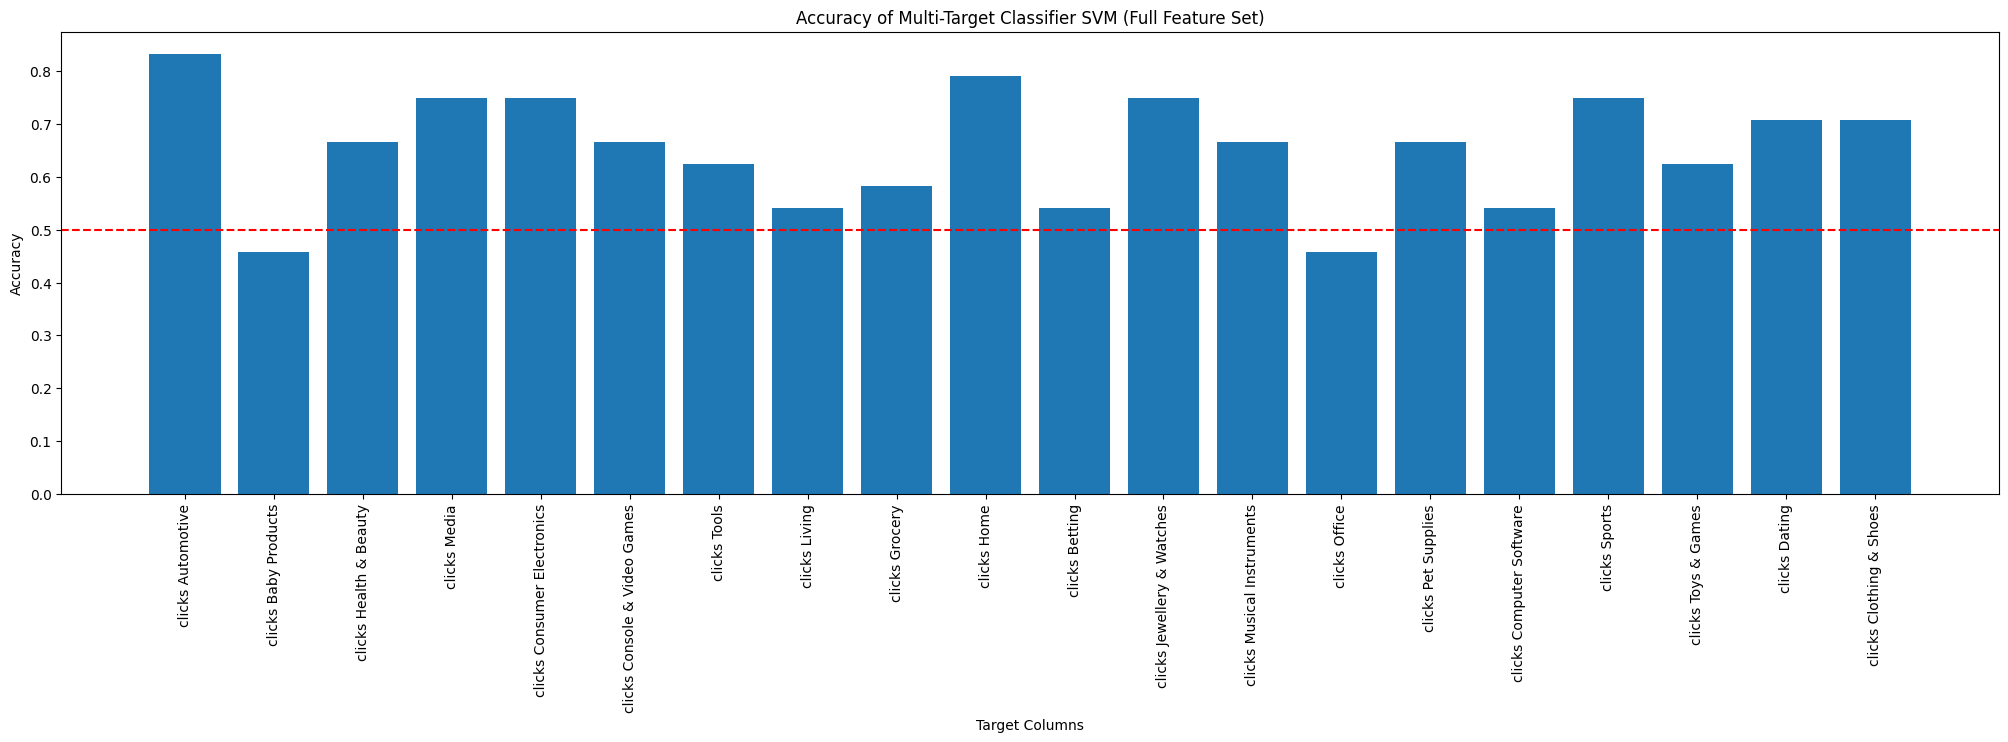

In [179]:
from sklearn.svm import SVC

# Define and train the SVM model
svm = SVC(
    kernel='rbf',  # Kernel type, e.g., 'linear', 'rbf', 'poly'
    C=1.0,  # Regularization parameter (default is 1.0)
    gamma='scale',  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=17
)

# Train with full data
multi_target_classifier = MultiOutputClassifier(svm)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.421053 | 0.727273 |   0.533333 | 11        |
| 1            |    0.4      | 0.153846 |   0.222222 |

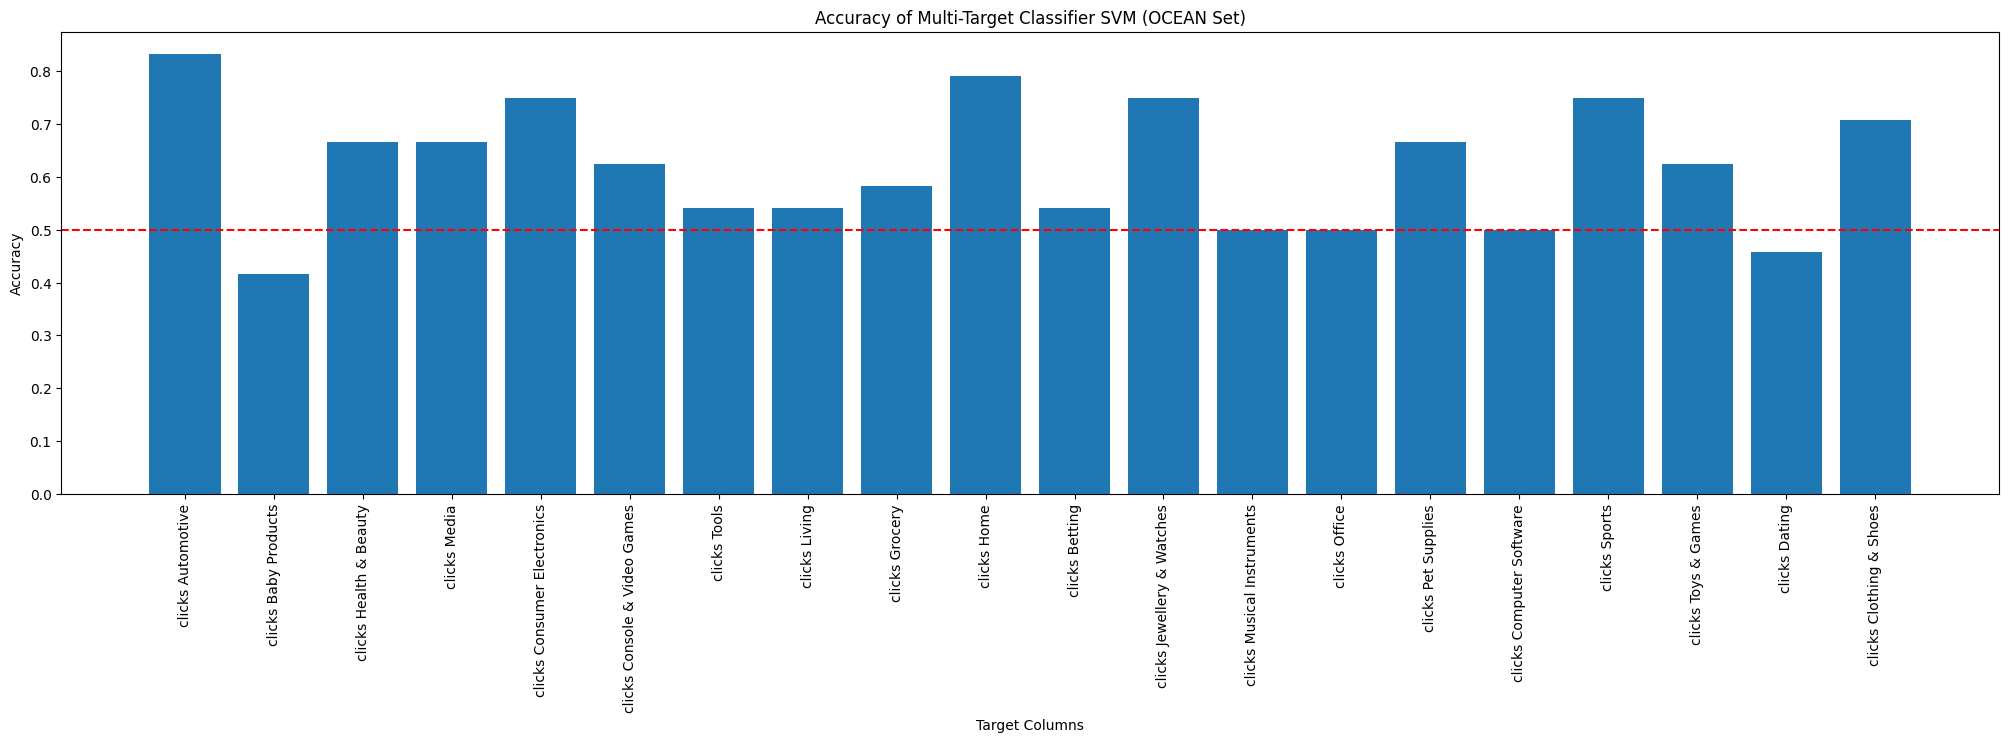

In [180]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define and train the SVM model
svm = SVC(
    kernel='rbf',  # Kernel type, e.g., 'linear', 'rbf', 'poly'
    C=1.0,  # Regularization parameter (default is 1.0)
    gamma='scale',  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=17
)

# Train with full data
multi_target_classifier = MultiOutputClassifier(svm)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
OCEAN_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (OCEAN Set)')
plt.xticks(rotation=90)
plt.show()


## Random Forest

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.4      | 0.5      |   0.444444 |  4        |
| 1            |    0.894737 | 0.85     |   0.871795 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.647368 | 0.675    |   0.65812  | 24        |
| weighted avg |    0.812281 | 0.791667 |   0.80057  | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.352941 | 0.545455 |   0.428571 | 11        |
| 1            |    0.285714 | 0.153846 |   0.2      |

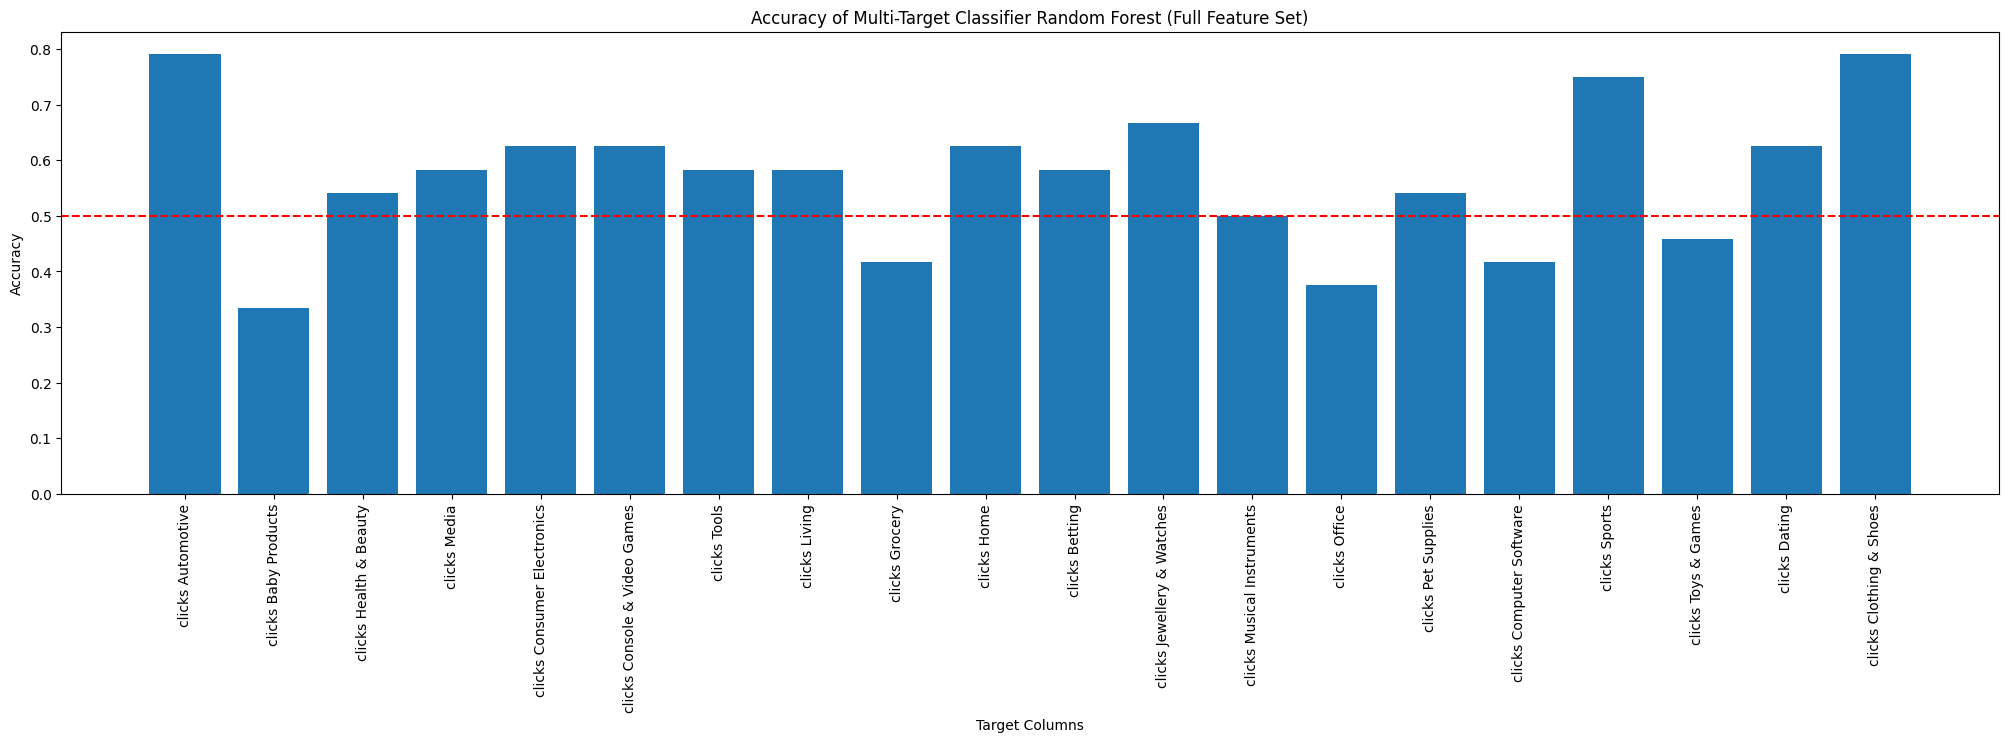

In [181]:
# Train with Full data
multi_target_classifier = MultiOutputClassifier(rf_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Random Forest (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.222222 |    0.5   |   0.307692 |     4     |
| 1            |    0.866667 |    0.65  |   0.742857 |    20     |
| accuracy     |    0.625    |    0.625 |   0.625    |     0.625 |
| macro avg    |    0.544444 |    0.575 |   0.525275 |    24     |
| weighted avg |    0.759259 |    0.625 |   0.67033  |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.4375   | 0.636364 |   0.518519 | 11        |
| 1            |    0.5      | 0.307692 |   0.380952 |

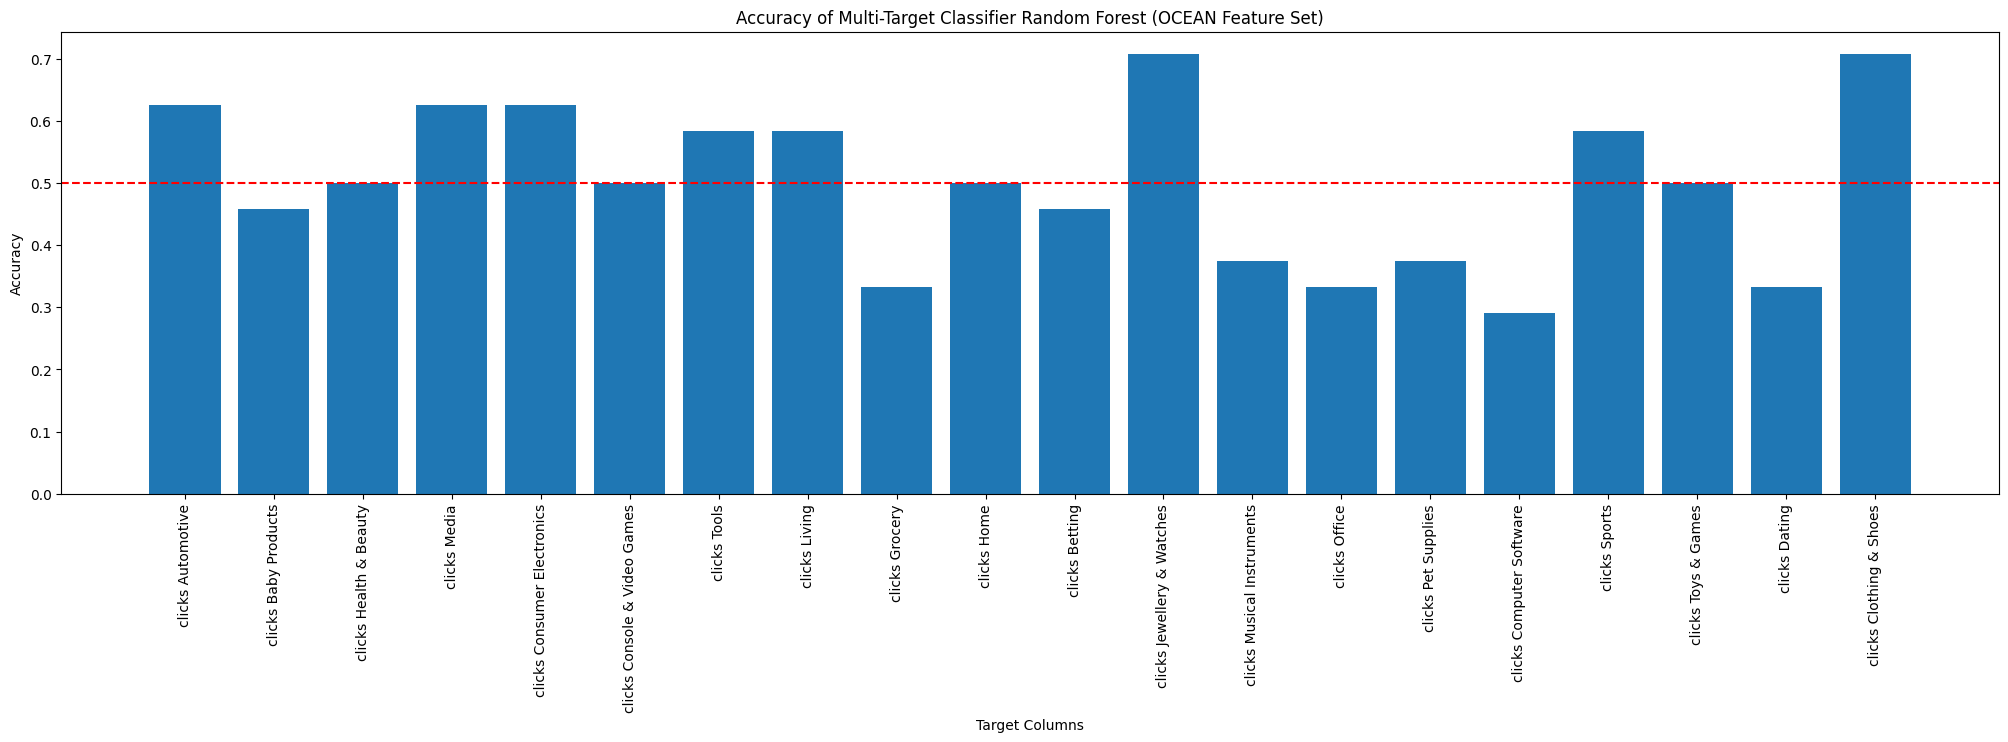

In [182]:
# Train on OCEAN Features Only
multi_target_classifier = MultiOutputClassifier(rf_clf)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
OCEAN_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Random Forest (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()

## LightGBM

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

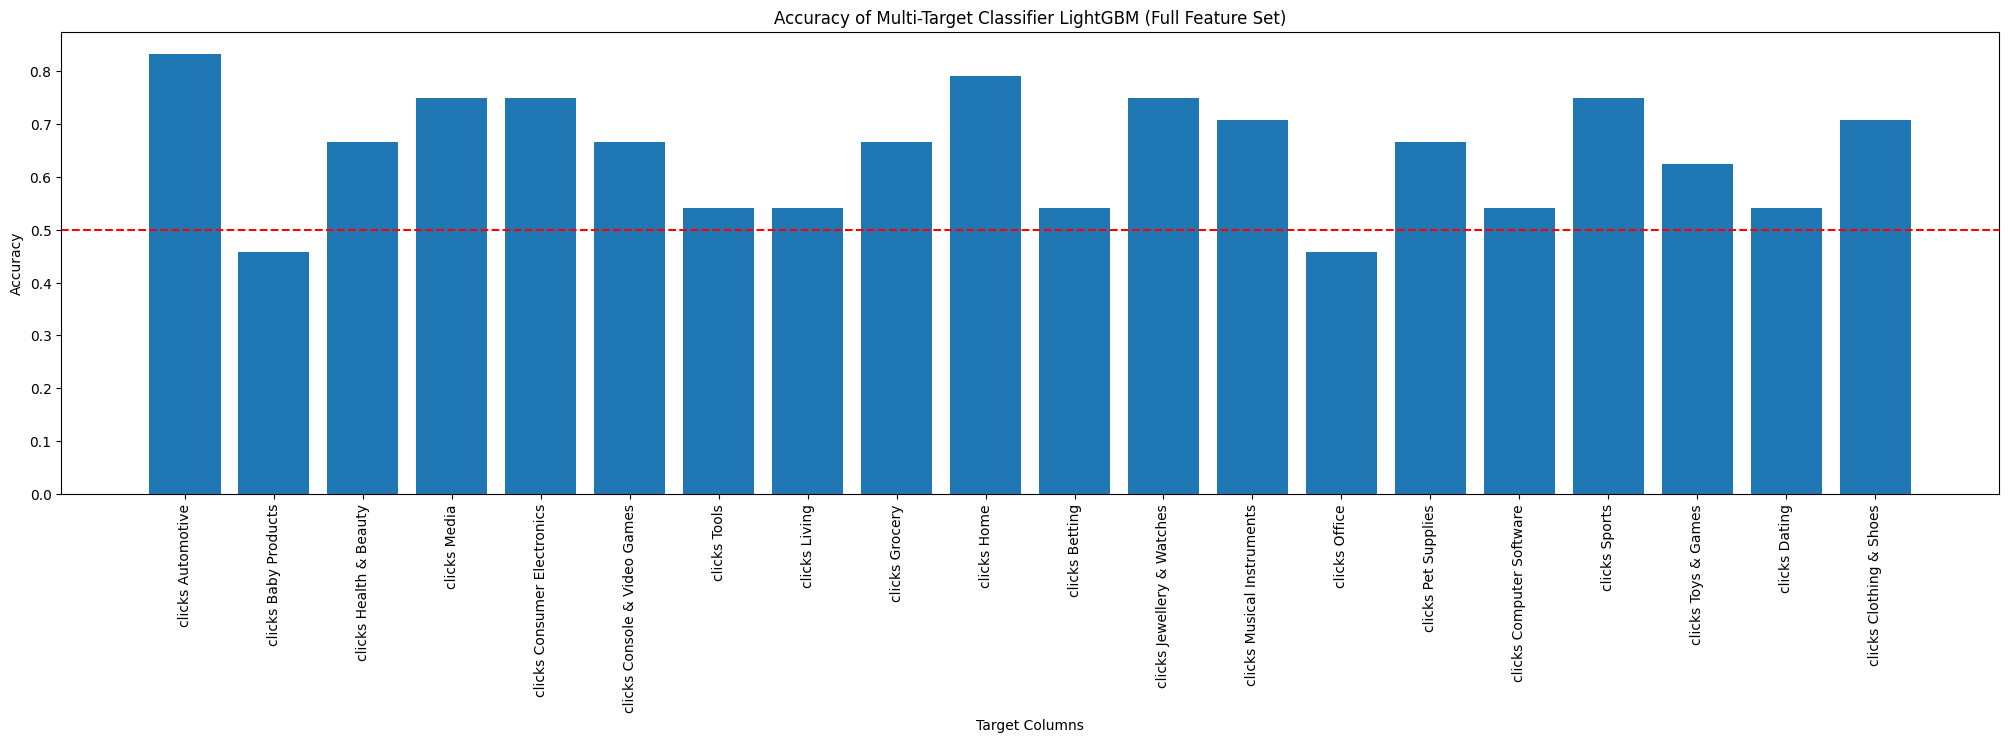

In [183]:
multi_target_classifier = MultiOutputClassifier(LightGBM_Clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier LightGBM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.137901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

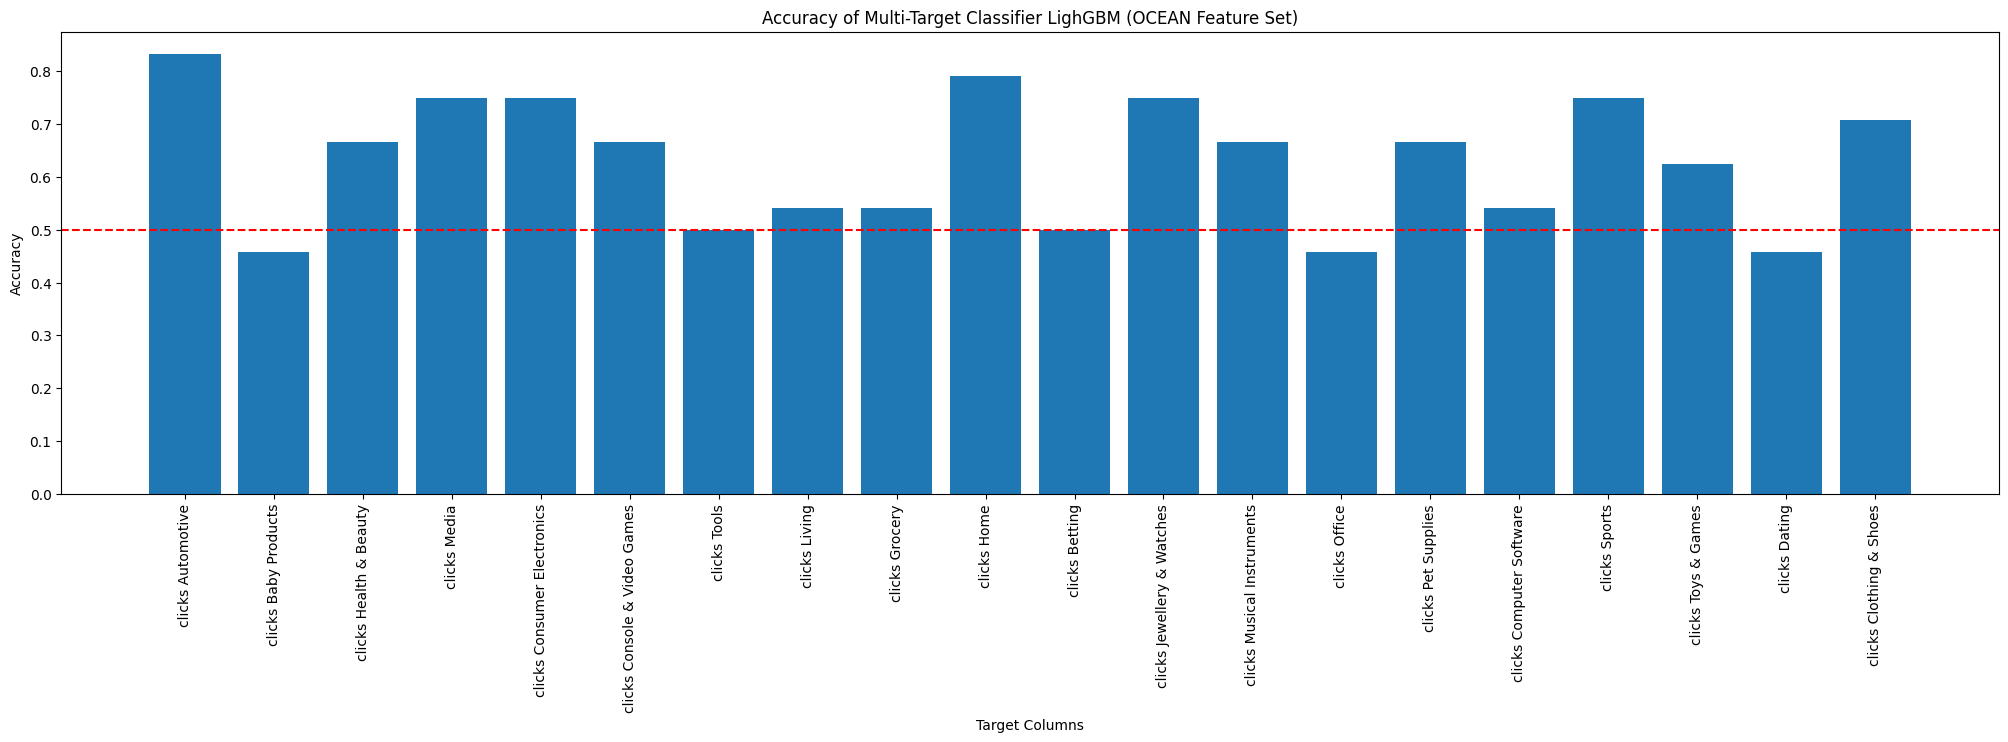

In [184]:
multi_target_classifier = MultiOutputClassifier(LightGBM_Clf)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
OCEAN_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier LighGBM (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()

## XGBoost

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.25     | 0.5      |   0.333333 |  4        |
| 1            |    0.875    | 0.7      |   0.777778 | 20        |
| accuracy     |    0.666667 | 0.666667 |   0.666667 |  0.666667 |
| macro avg    |    0.5625   | 0.6      |   0.555556 | 24        |
| weighted avg |    0.770833 | 0.666667 |   0.703704 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.47619  | 0.909091 |   0.625    |      11   |
| 1            |    0.666667 | 0.153846 |   0.25     |

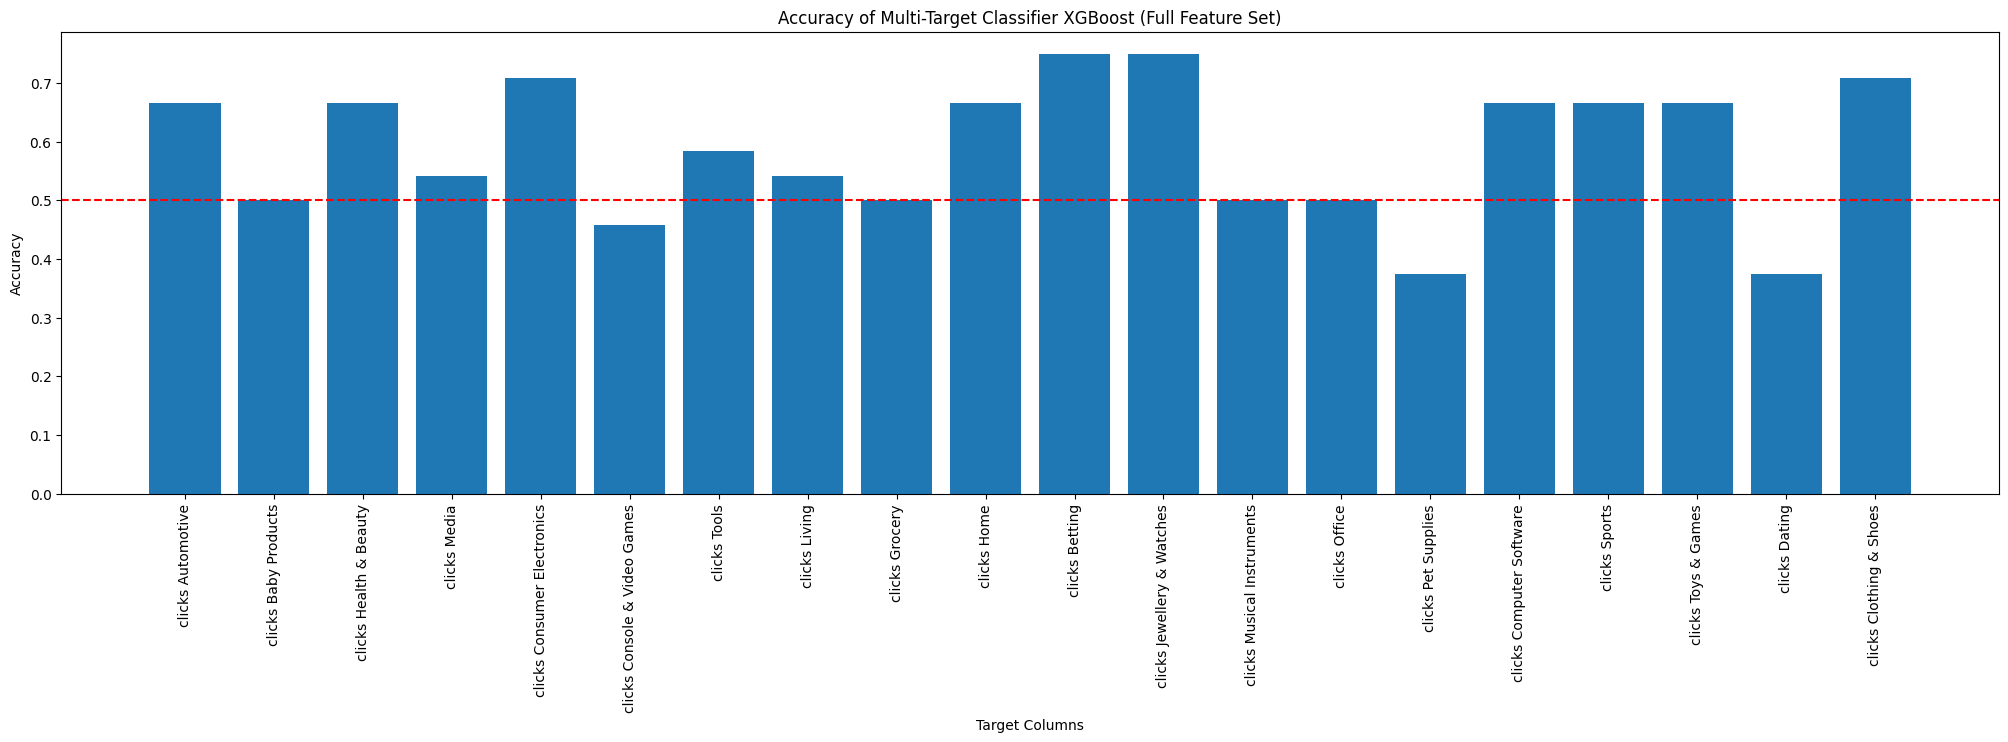

In [185]:
multi_target_classifier = MultiOutputClassifier(xgboost_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')
    

# Store the accuracy scores for each target column
Full_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier XGBoost (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.181818 | 0.5      |   0.266667 |  4        |
| 1            |    0.846154 | 0.55     |   0.666667 | 20        |
| accuracy     |    0.541667 | 0.541667 |   0.541667 |  0.541667 |
| macro avg    |    0.513986 | 0.525    |   0.466667 | 24        |
| weighted avg |    0.735431 | 0.541667 |   0.6      | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Baby Products':
+--------------+-------------+-----------+------------+-----------+
|              |   precision |    recall |   f1-score |   support |
|--------------+-------------+-----------+------------+-----------|
| 0            |    0.478261 | 1         |   0.647059 |      11   |
| 1            |    1        | 0.0769231 |   0.142

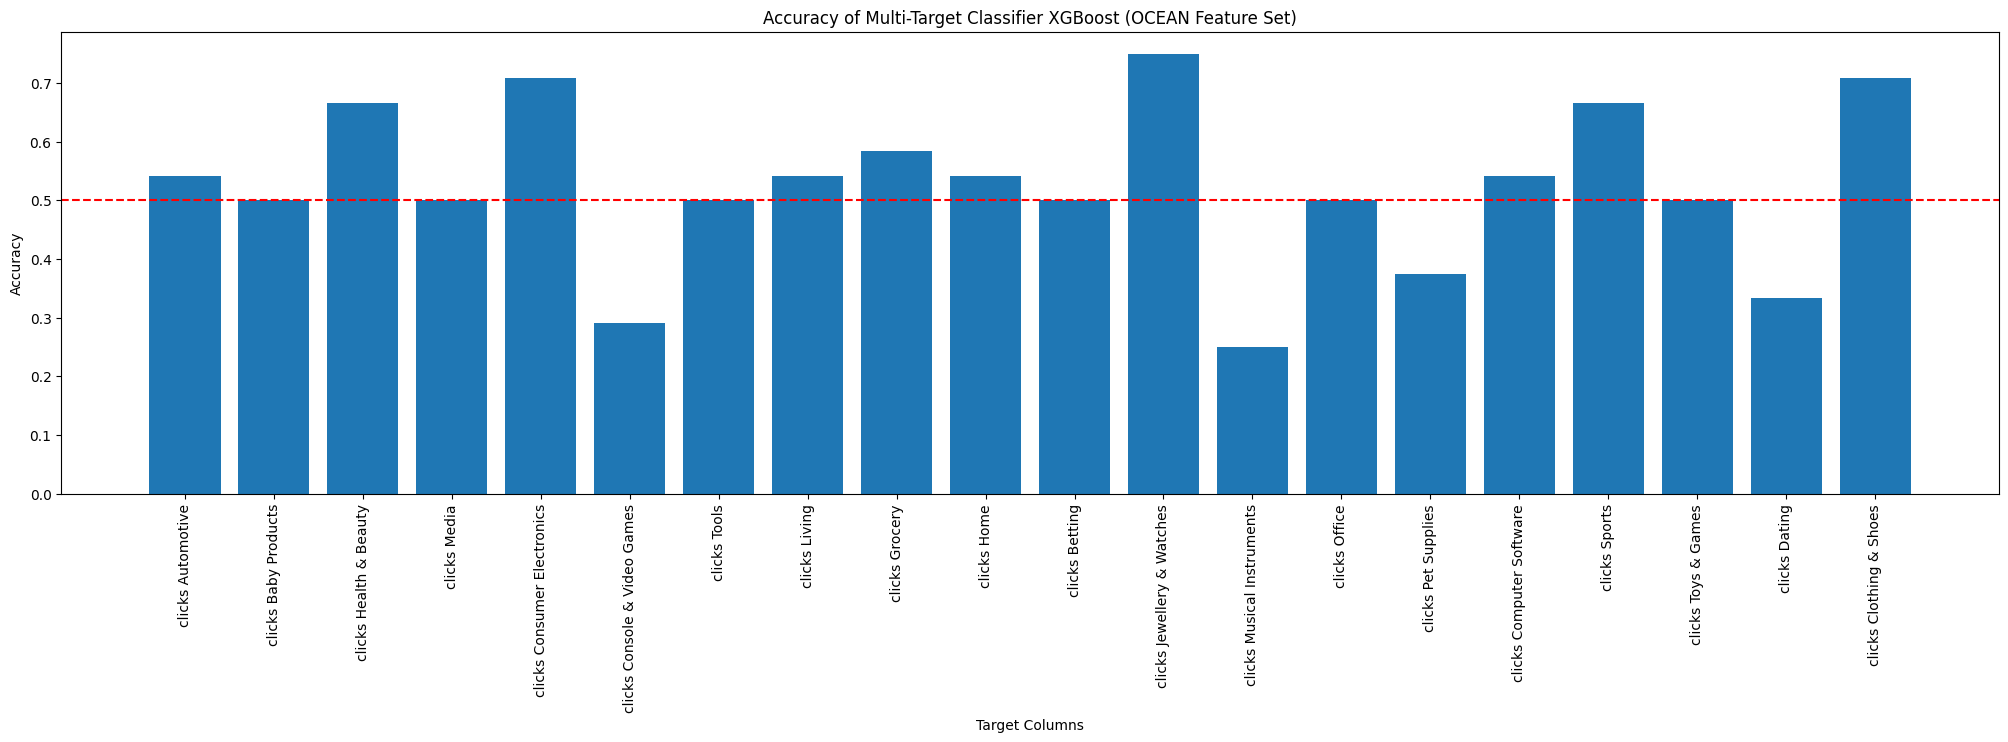

In [186]:
multi_target_classifier = MultiOutputClassifier(xgboost_clf)
multi_target_classifier.fit(X_train_OCEAN, y_train)

y_pred = multi_target_classifier.predict(X_test_OCEAN)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')
    

# Store the accuracy scores for each target column
OCEAN_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    OCEAN_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(25, 6))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, OCEAN_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier XGBoost (OCEAN Feature Set)')
plt.xticks(rotation=90)
plt.show()

# Plot Accuracies Together

In [173]:
Full_LGR_accuracies
Full_NB_accuracies
Full_SVM_accuracies

[0.7916666666666666,
 0.4583333333333333,
 0.4166666666666667,
 0.625,
 0.5416666666666666,
 0.4583333333333333,
 0.4583333333333333,
 0.5416666666666666,
 0.5416666666666666,
 0.5833333333333334,
 0.625,
 0.3333333333333333,
 0.6666666666666666,
 0.7083333333333334,
 0.375,
 0.625,
 0.6666666666666666,
 0.625,
 0.5416666666666666,
 0.625]

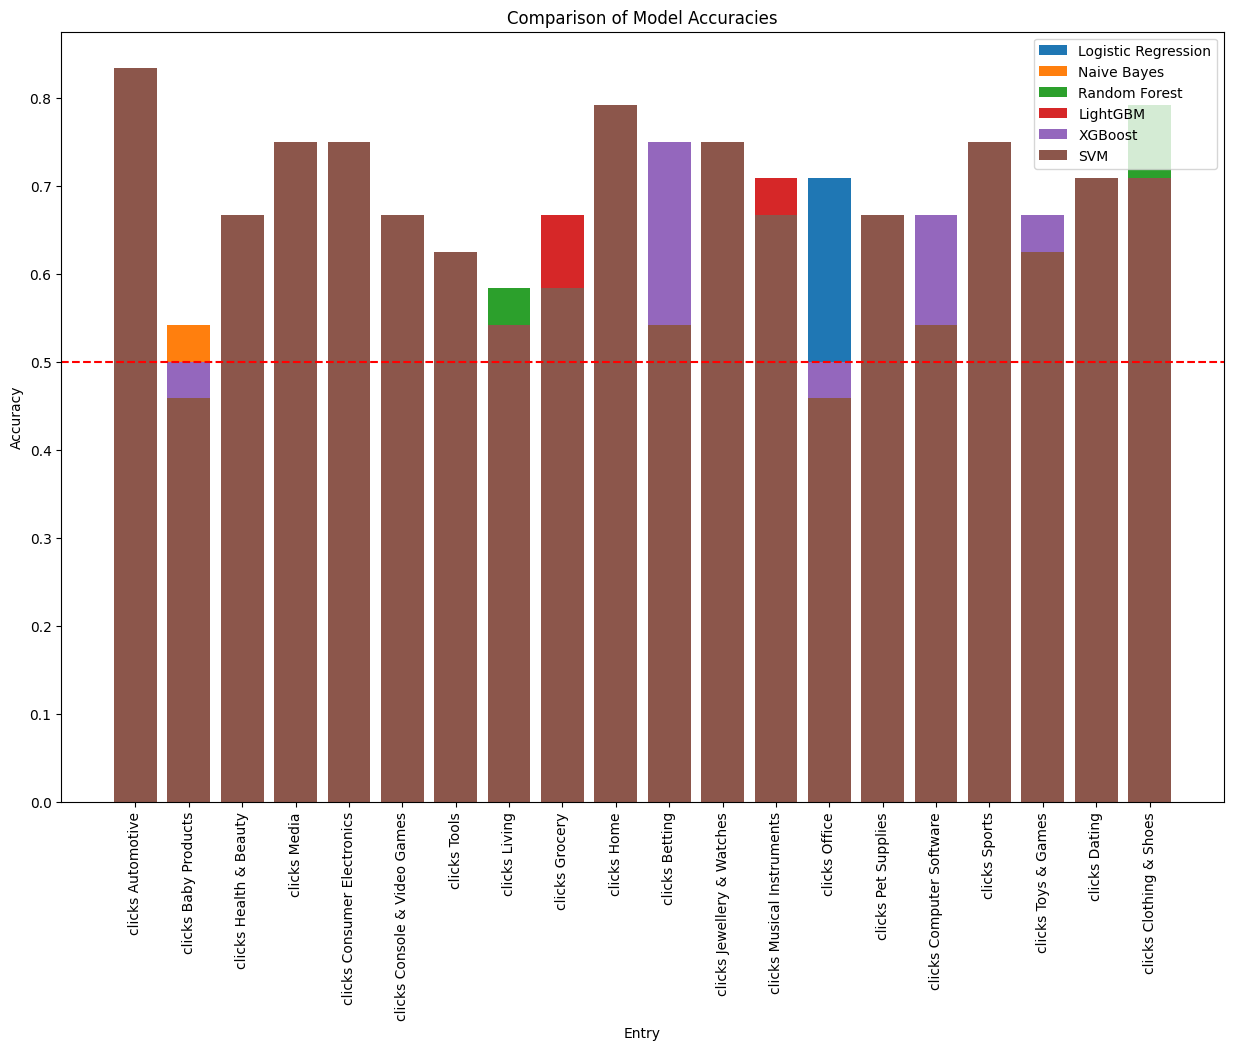

In [204]:
column_names = y.columns

# Plotting the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')

plt.bar(range(len(Full_LGR_accuracies)), Full_LGR_accuracies, label='Logistic Regression')
plt.bar(range(len(Full_NB_accuracies)), Full_NB_accuracies, label='Naive Bayes')
plt.bar(range(len(Full_RF_accuracies)), Full_RF_accuracies, label='Random Forest')
plt.bar(range(len(Full_LGBM_accuracies)), Full_LGBM_accuracies, label='LightGBM')
plt.bar(range(len(Full_XGB_accuracies)), Full_XGB_accuracies, label='XGBoost')
plt.bar(range(len(Full_SVM_accuracies)), Full_SVM_accuracies, label='SVM')

plt.xticks(range(len(column_names)), column_names)  # Set the x-axis tick labels
plt.xticks(rotation=90)

plt.xlabel('Entry')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()

plt.show()


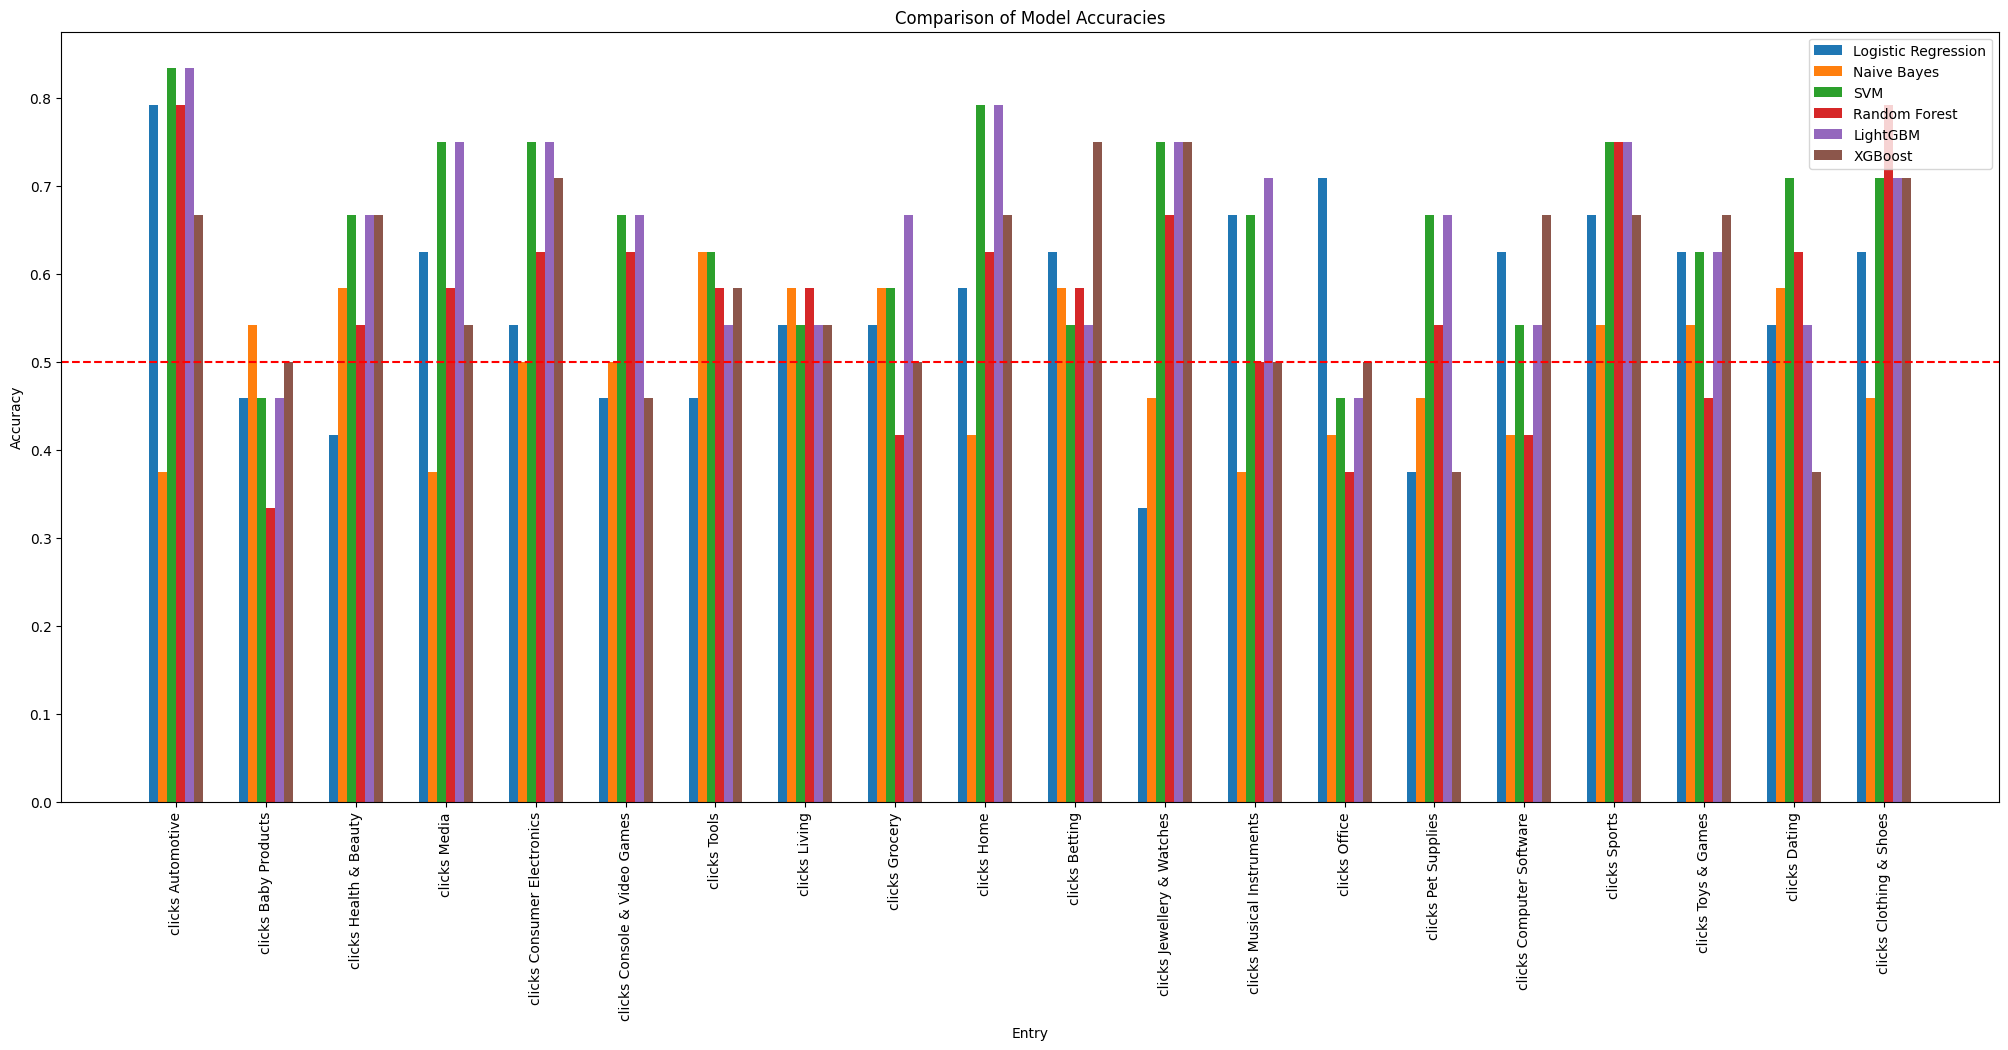

In [203]:
import matplotlib.pyplot as plt
import numpy as np

column_names = y.columns

# Combine the accuracies into a single list
accuracies = [Full_LGR_accuracies, Full_NB_accuracies, Full_SVM_accuracies, Full_RF_accuracies, Full_LGBM_accuracies, Full_XGB_accuracies]

# Generate x-axis positions
x_positions = np.arange(len(column_names))

# Set the width of each bar
bar_width = 0.1

# Define model labels
model_labels = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'LightGBM', 'XGBoost']

# Plotting the accuracies
plt.figure(figsize=(25, 10))
plt.axhline(y=0.5, color='r', linestyle='--')

for i, accuracy in enumerate(accuracies):
    plt.bar(x_positions + (i - 2.5) * bar_width, accuracy, width=bar_width, label=model_labels[i])

plt.xticks(x_positions, column_names, rotation=90)
plt.xlabel('Entry')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()

plt.show()
